# LOGIN 2023 - DATATHON

## Attention-deficit/hyperactivity Disorder(ADHD)

### 1. Data Preprocessing

In [14]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df1 = pd.DataFrame(columns=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2'])
df2 = pd.DataFrame(columns=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2'])

In [3]:
folderpath1 = "C:/Users/pl/Downloads/login-2k23-datathon/ADHD/ADHD/ADHD_part1/"
folderpath2 = "C:/Users/pl/Downloads/login-2k23-datathon/ADHD/ADHD/ADHD_part2/"
folderpath3 = "C:/Users/pl/Downloads/login-2k23-datathon/ADHD/ADHD/Control_part1/"
folderpath4 = "C:/Users/pl/Downloads/login-2k23-datathon/ADHD/ADHD/Control_part2/"

In [4]:
for filename in os.listdir(folderpath1):
    filepath = os.path.join(folderpath1, filename)
    data = loadmat(filepath)
    arr = filename[:-4]
    df1 = pd.concat([df1, pd.DataFrame(data[arr],columns=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2'])], axis=0)

In [5]:
for filename in os.listdir(folderpath2):
    filepath = os.path.join(folderpath2, filename)
    data = loadmat(filepath)
    arr = filename[:-4]
    df1 = pd.concat([df1, pd.DataFrame(data[arr],columns=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2'])], axis=0)

In [6]:
for filename in os.listdir(folderpath3):
    filepath = os.path.join(folderpath3, filename)
    data = loadmat(filepath)
    arr = filename[:-4]
    df2 = pd.concat([df2, pd.DataFrame(data[arr],columns=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2'])], axis=0)

In [7]:
for filename in os.listdir(folderpath4):
    filepath = os.path.join(folderpath4, filename)
    data = loadmat(filepath)
    arr = filename[:-4]
    df2 = pd.concat([df2, pd.DataFrame(data[arr],columns=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2'])], axis=0)

In [8]:
df1 = df1.astype(float)
df2 = df2.astype(float)

In [9]:
df1['label'] = '0'
df2['label'] = '1'

In [18]:
df = pd.concat([df1,df2],axis=0)
df.head()

,Fz,Cz,Pz,C3,T3,C4,T4,Fp1,Fp2,F3,F4,F7,F8,P3,P4,T5,T6,O1,O2,label
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,0
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,0
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,0
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,0
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,0


In [19]:
df.shape

(2166383, 20)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166383 entries, 0 to 17792
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fz      float64
 1   Cz      float64
 2   Pz      float64
 3   C3      float64
 4   T3      float64
 5   C4      float64
 6   T4      float64
 7   Fp1     float64
 8   Fp2     float64
 9   F3      float64
 10  F4      float64
 11  F7      float64
 12  F8      float64
 13  P3      float64
 14  P4      float64
 15  T5      float64
 16  T6      float64
 17  O1      float64
 18  O2      float64
 19  label   object 
dtypes: float64(19), object(1)
memory usage: 347.1+ MB


In [22]:
df['label'].value_counts()

0    1207069
1     959314
Name: label, dtype: int64

In [11]:
X = df.drop(['label'],axis=1)
y = df['label']

### 2. Visuailzation

<Axes: >

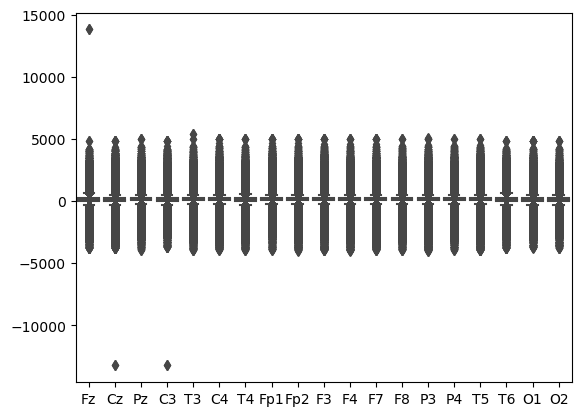

In [12]:
seaborn.boxplot(df)

In [40]:
scaler = StandardScaler()
scaler = scaler.fit(X)
x_scaled = scaler.transform(X)

In [41]:
X_train,X_test,y_train, y_test = train_test_split(x_scaled,y,random_state=104, test_size=0.25,shuffle=True)

In [51]:
X_train = X_train[0:1000]
X_test = X_test[0:1000]
y_train = y_train[0:1000]
y_test = y_test[0:1000]

<Axes: >

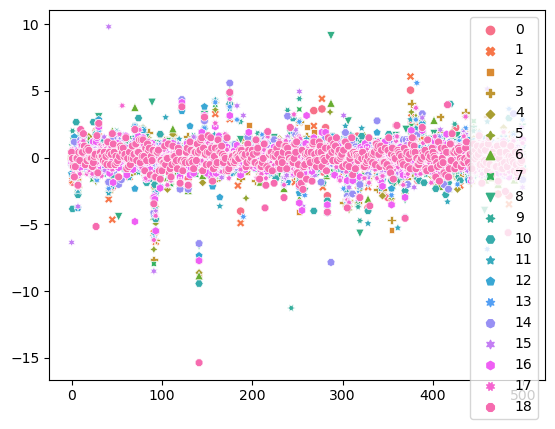

In [82]:
seaborn.scatterplot(X_train)

<Axes: ylabel='count'>

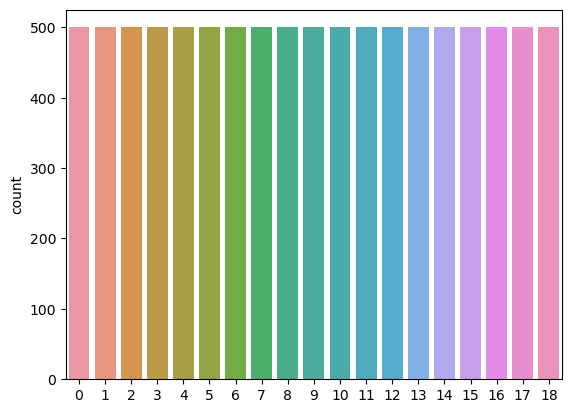

In [83]:
seaborn.countplot(X_train)

<Axes: >

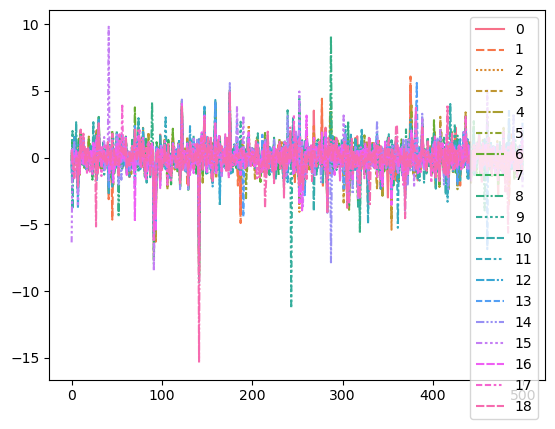

In [84]:
seaborn.lineplot(X_train)

<Axes: >

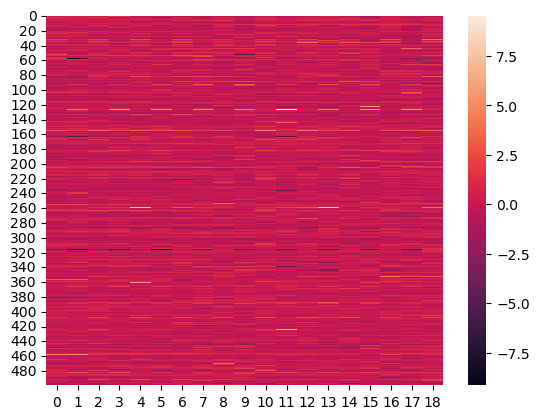

In [76]:
seaborn.heatmap(X_test)

### 3. Modelling

In [52]:
lor = LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred_lr=lor.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.51

In [54]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [55]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57       258
           1       0.49      0.39      0.44       242

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.50       500
weighted avg       0.51      0.51      0.50       500



In [56]:
svc=SVC(kernel='rbf') 
svc.fit(X_train, y_train)

SVC()

In [57]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       258
           1       0.58      0.42      0.49       242

    accuracy                           0.57       500
   macro avg       0.58      0.57      0.56       500
weighted avg       0.58      0.57      0.56       500



In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64       258
           1       0.58      0.40      0.48       242

    accuracy                           0.57       500
   macro avg       0.58      0.57      0.56       500
weighted avg       0.57      0.57      0.56       500



### Predicting test dataset

In [67]:
test = pd.read_csv('C:/Users/pl/Downloads/login-2k23-datathon/test.csv',index_col=0)
test.sample(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
14,0.340467,0.448040,0.425526,0.493649,0.474219,0.357667,0.409591,0.423554,0.289312,0.362446,0.366076,0.421299,0.327797,0.360296,0.388568,0.393917,0.268570,0.326056,0.337924
3,0.447663,0.242898,0.518887,0.201946,0.551273,0.295801,0.468233,0.247192,0.411847,0.229515,0.551066,0.279197,0.575884,0.297715,0.496169,0.200299,0.497482,0.294769,0.422316
5,0.402595,0.355883,0.502812,0.386641,0.515542,0.361846,0.466315,0.357740,0.415761,0.279231,0.401602,0.343257,0.410750,0.349266,0.390825,0.298350,0.483680,0.369104,0.454227
13,0.521243,0.453422,0.586749,0.489819,0.649421,0.531744,0.579137,0.326062,0.511330,0.403102,0.535881,0.481957,0.624538,0.509440,0.543329,0.350383,0.445845,0.406731,0.412143
6,0.309627,0.308228,0.318253,0.311602,0.241035,0.258376,0.239015,0.262239,0.198051,0.238987,0.291734,0.275732,0.160888,0.235560,0.175690,0.206070,0.312770,0.245459,0.255219


In [86]:
lor.predict(test)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0'], dtype=object)

In [87]:
svc.predict(test)

array(['0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1',
       '1', '1', '1'], dtype=object)

In [88]:
knn.predict(test)

array(['0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0'], dtype=object)